In [ ]:
#import libraries

# pandas for data manipulation and analysis
import pandas as pd

# numpy for numerical operations and array handling
import numpy as np

# matplotlib for creating plots and visualizations
import matplotlib.pyplot as plt

# seaborn for advanced data visualization
import seaborn as sns

# train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# mean_squared_error and r2_score for evaluating model performance
from sklearn.metrics import mean_squared_error, r2_score

# Importing train_test_split and cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score

# For saving the model
import joblib


In [ ]:
# Load the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset to understand its structure and content
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0  

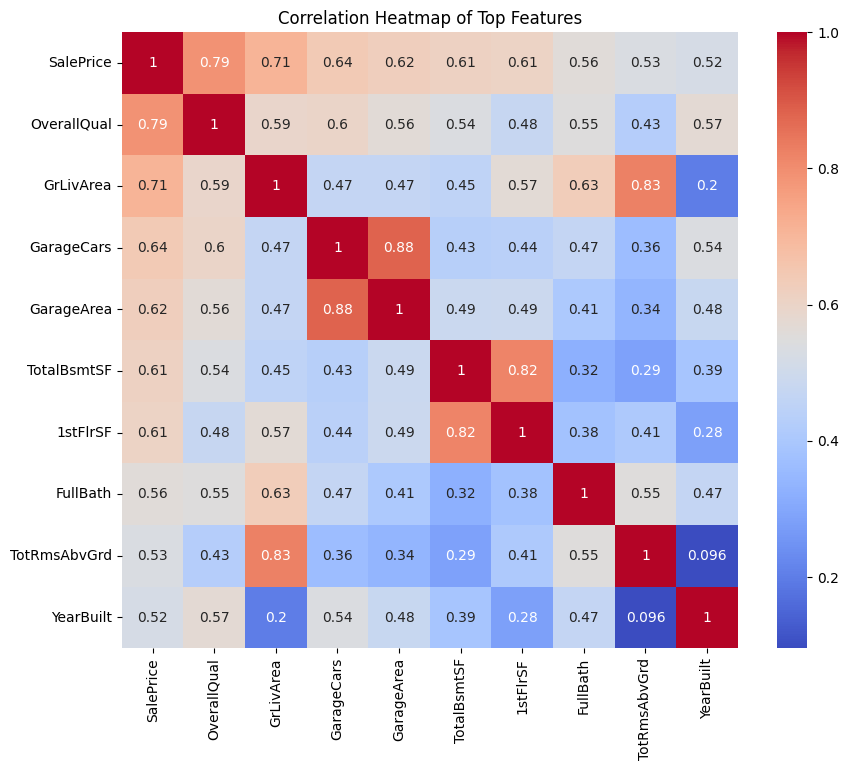

In [ ]:
# Filter numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Ensure there are numeric columns
if not numeric_data.empty:
    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Reduce the size of the heatmap by selecting top features correlated with 'SalePrice'
    target = 'SalePrice'  # Replace with your target variable
    if target in correlation_matrix.columns:
        # Sort features by their correlation with the target variable
        top_features = correlation_matrix[target].abs().sort_values(ascending=False).head(10).index
        reduced_corr_matrix = correlation_matrix.loc[top_features, top_features]

        # Plot the heatmap for the reduced correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(reduced_corr_matrix, annot=True, cmap="coolwarm", square=True)
        plt.title("Correlation Heatmap of Top Features")
        plt.show()
    else:
        print(f"Target variable '{target}' not found in the dataset.")
else:
    print("No numeric columns found in the dataset for correlation.")


In [ ]:

# Combine feature data and target for consistent cleaning
combined_data = data[[
    'GrLivArea',
    'BedroomAbvGr',
    'FullBath',
    'YearBuilt',
    'LotArea',
    'GarageCars',
    'GarageArea',
    'TotalBsmtSF',
    'OverallQual',
    'OverallCond',
    'SalePrice'
]]

# Check and drop missing values in the selected columns
missing_values = combined_data.isnull().sum()

if missing_values.any():
    print("\nWarning: Missing values detected. Corresponding rows will be removed.")
    combined_data = combined_data.dropna()

# Separate features and target after cleaning
features = combined_data[[
    'GrLivArea',
    'BedroomAbvGr',
    'FullBath',
    'YearBuilt',
    'LotArea',
    'GarageCars',
    'GarageArea',
    'TotalBsmtSF',
    'OverallQual',
    'OverallCond',
]]
target = combined_data['SalePrice']

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets, ensuring reproducibility with random_state=42.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Initialize a Linear Regression model.
model=LinearRegression()

# Train the model using the training features (X_train) and target values (y_train).
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Cross-Validation
cv_scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", -cv_scores.mean())

Cross-Validation Mean Squared Error: 1457903352.7717729


In [ ]:
# Make predictions on the test set (X_test) using the trained model.
#predictions=model.predict(X_test)

In [ ]:
# Make predictions on the test set using the trained model.
y_pred = model.predict(X_test)

# Evaluate the model by calculating the Mean Squared Error (MSE) between the actual and predicted values.
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE.
rmse = np.sqrt(mse)

# Calculate the R-squared value to measure the proportion of variance explained by the model.
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics: MSE, RMSE, and R-squared.
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Model Coefficients: [ 5.65733345e+01 -6.78455448e+03 -2.54456566e+03  4.64948336e+02
  6.15862507e-01  1.24551330e+04  6.53919321e+00  2.05990228e+01
  1.87392299e+04  6.32418754e+03]
Model Intercept: -1001535.801746329
Mean Squared Error: 1445063867.621577
Root Mean Squared Error: 38013.99568082231
R-squared: 0.8116033362091502


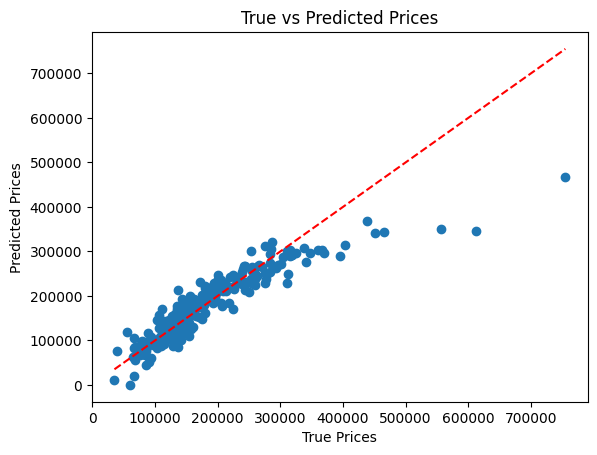

In [ ]:
# Plot true vs predicted prices
plt.scatter(y_test, y_pred)
# Line representing perfect predictions
plt.xlabel('True Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()


In [ ]:
# Create a DataFrame with the feature names and their corresponding model coefficients
coefficients=pd.DataFrame({
    'Feature':X_train.columns,    # The feature names (column names of the training dataset)
    'Coefficient':model.coef_     # The model coefficients (learned values for each feature)
})

# Print the DataFrame to show the features and their corresponding coefficients
print(coefficients)

        Feature   Coefficient
0     GrLivArea     56.573334
1  BedroomAbvGr  -6784.554479
2      FullBath  -2544.565664
3     YearBuilt    464.948336
4       LotArea      0.615863
5    GarageCars  12455.133038
6    GarageArea      6.539193
7   TotalBsmtSF     20.599023
8   OverallQual  18739.229886
9   OverallCond   6324.187540


In [ ]:
# Display the intercept (y-intercept) of the model
print(f"\nOrdonnee a l'origine (intercept) : {model.intercept_}")


Ordonnee a l'origine (intercept) : -1001535.801746329
